In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv("Diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## EDA

In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
fig = px.histogram(df, 
                   x='Age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [7]:
fig = px.histogram(df, 
                   x='BMI', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(df, 
                   x='Pregnancies', 
                   marginal='box', 
                   color_discrete_sequence=['green'], 
                   title='Distribution of Pregnancies')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(df, 
                   x='Age', 
                   marginal='box', 
                   color='Outcome',
                   nbins=47, 
                   title='Distribution of Age over the outcome')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(df, 
                   x='Pregnancies', 
                   marginal='box', 
                   color='Outcome',
                   color_discrete_sequence=['green', 'red'], 
                   title='Distribution of Pregnancies over Outcome ')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(df, 
                   x='BloodPressure', 
                   marginal='box', 
                   color='Outcome',
                   nbins=47, 
                   title='Distribution of BloodPressure over the outcome')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
df_corr = df.corr(numeric_only=True)
df_corr.style

In [13]:
df_rank= df_corr['Outcome'].sort_values(ascending = False)
df_rank

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

- glucose is some what corelated to the diabestes

In [14]:
fig = px.histogram(df, 
                   x='Glucose', 
                   marginal='box', 
                   color='Outcome',
                   nbins=47, 
                   title='Distribution of Glucose over the outcome')
fig.update_layout(bargap=0.1)
fig.show()

<AxesSubplot: xlabel='Outcome', ylabel='count'>

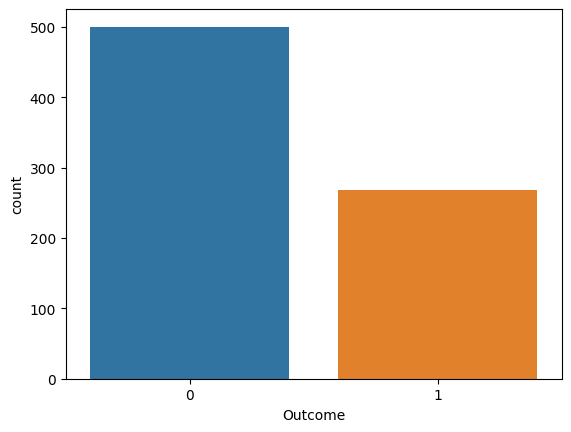

In [15]:
sns.countplot(df,x='Outcome')

In [16]:
fig=px.scatter(df,
                 x='Glucose',
               y='Age',
                 color='Outcome',
                 title='Age  vs glucose vs diabetes'
                 )
fig.update_layout(bargap=0.1)
fig.show()

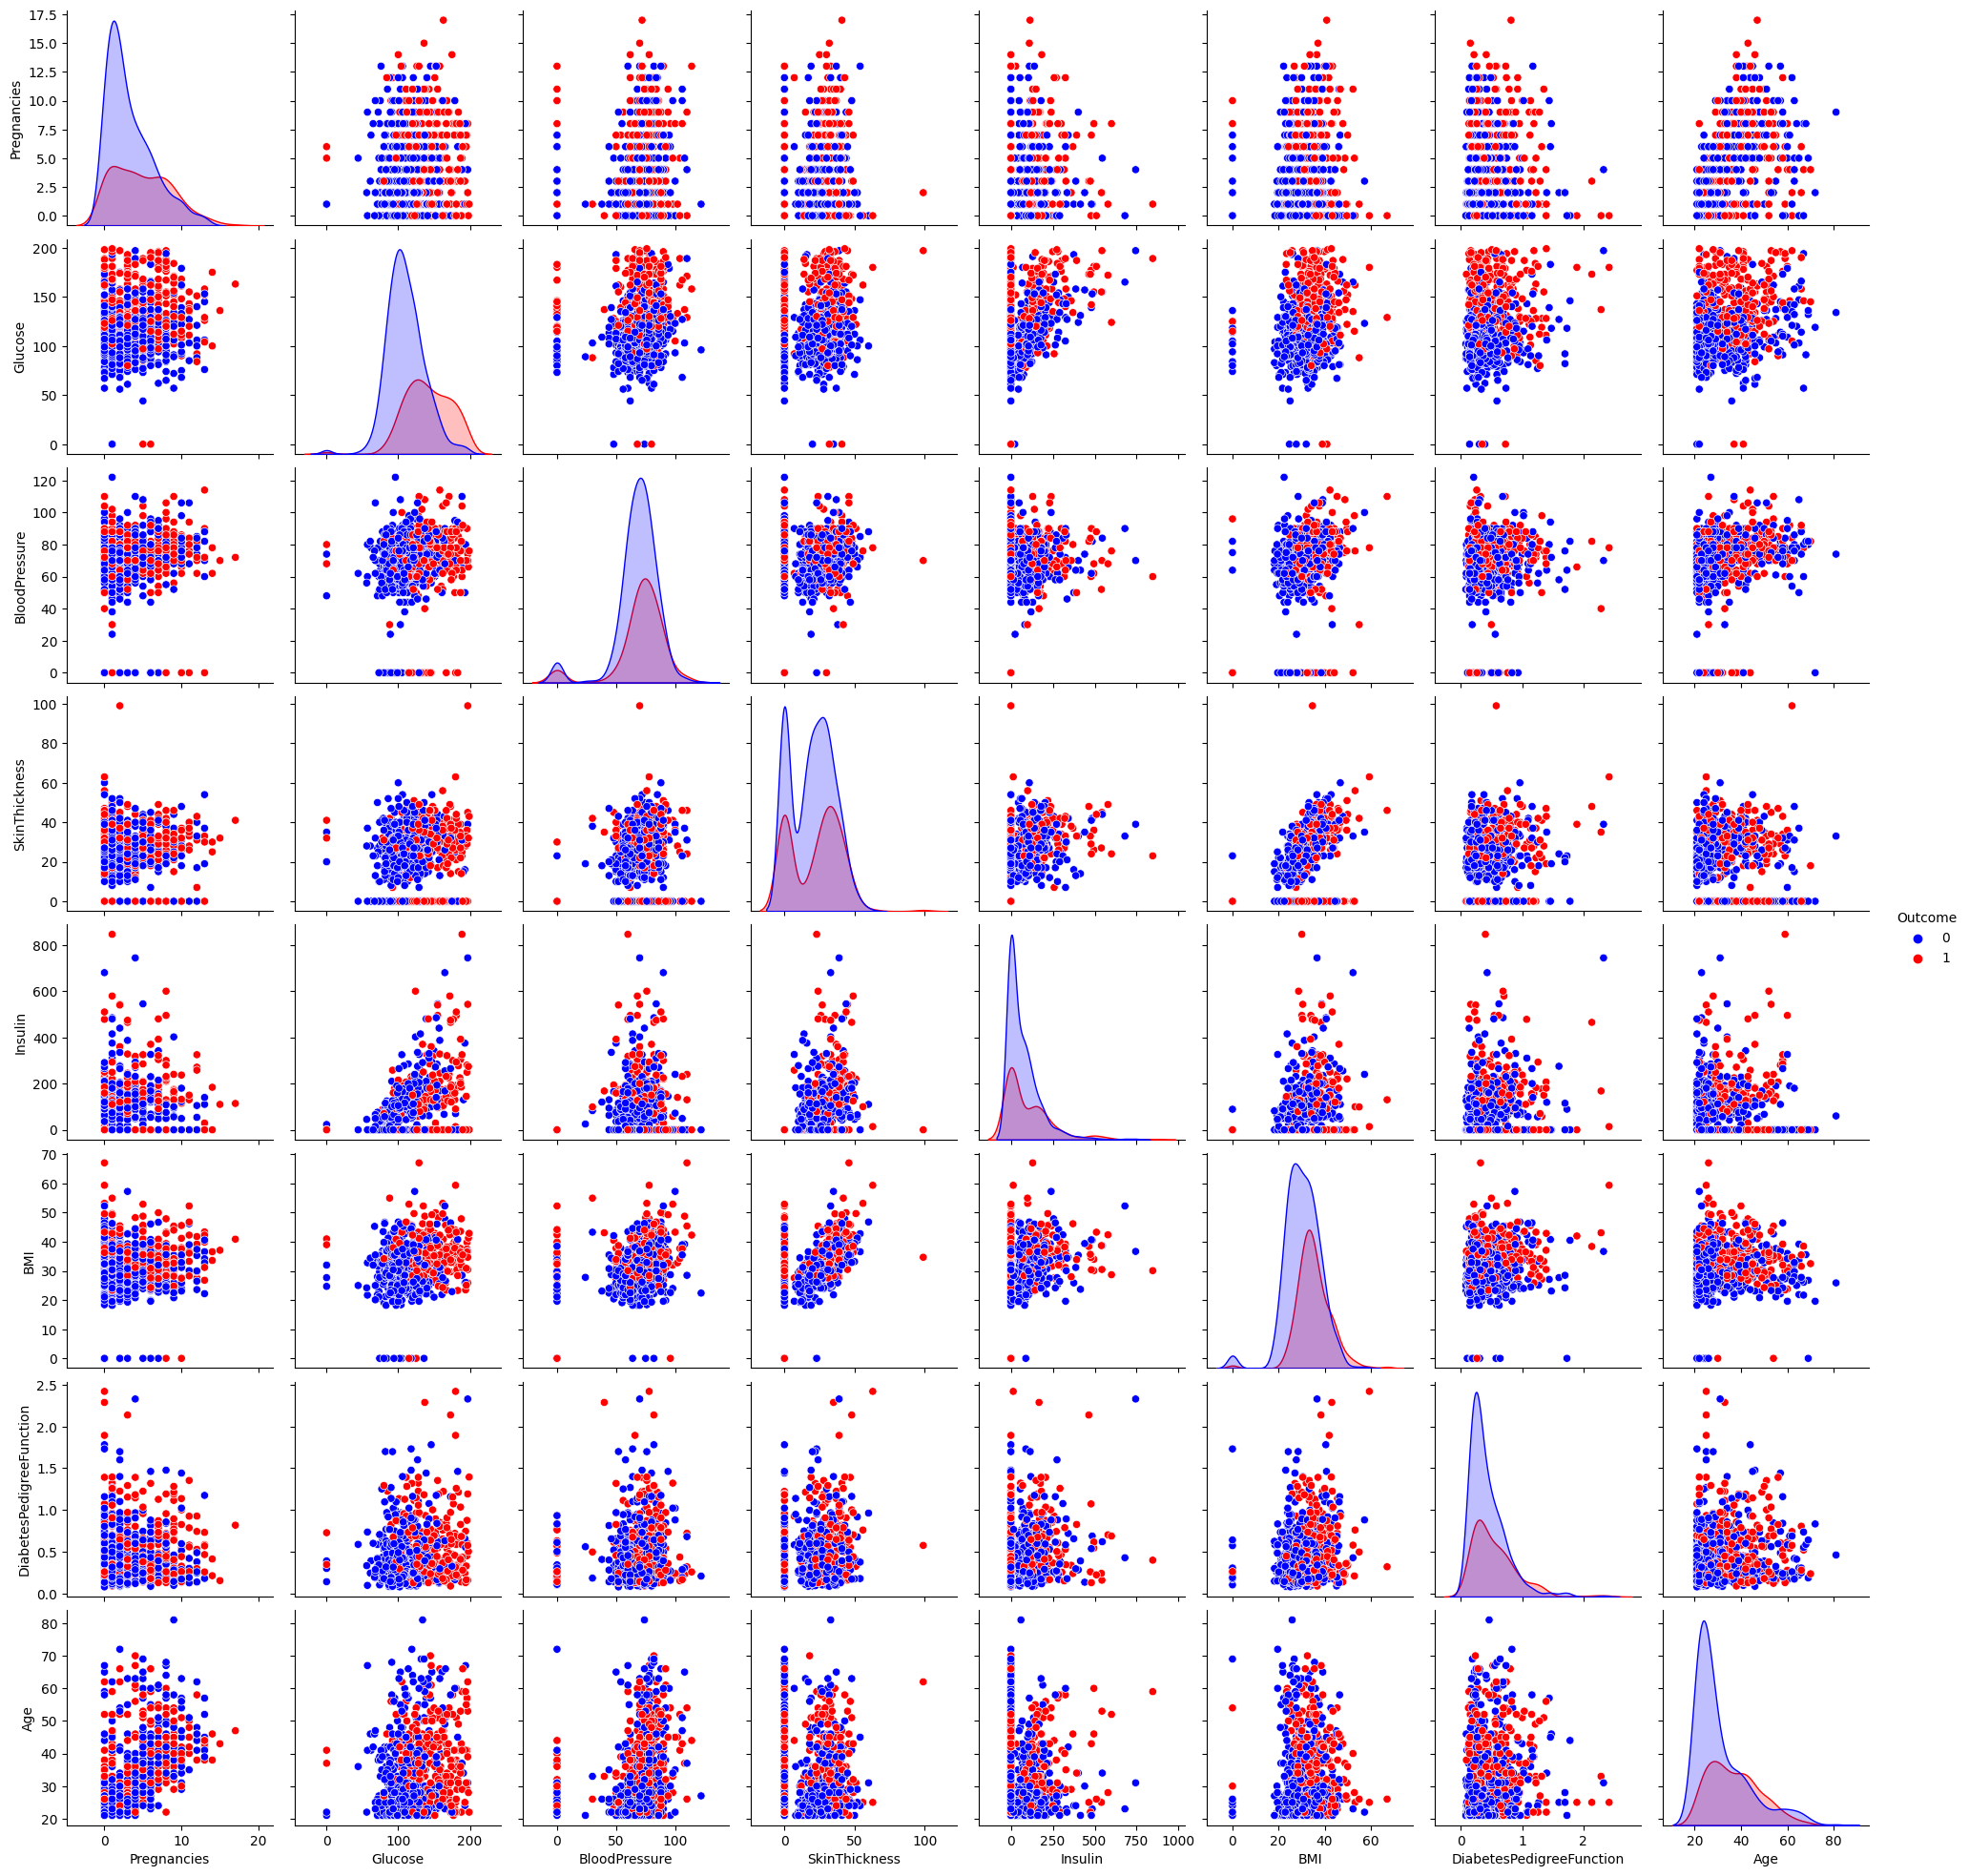

In [17]:
sns.pairplot(df, hue="Outcome", palette={0:'blue',1:"red"})
plt.show()

## Scaling Numeric Features

In [18]:
x=df.iloc[:,:8]

from sklearn.preprocessing import MinMaxScaler
cols=x.columns
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)
x=pd.DataFrame(x,columns=[cols])
x

Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.352941  0.743719      0.590164      0.353535  0.000000  0.500745   
1      0.058824  0.427136      0.540984      0.292929  0.000000  0.396423   
2      0.470588  0.919598      0.524590      0.000000  0.000000  0.347243   
3      0.058824  0.447236      0.540984      0.232323  0.111111  0.418778   
4      0.000000  0.688442      0.327869      0.353535  0.198582  0.642325   
..          ...       ...           ...           ...       ...       ...   
763    0.588235  0.507538      0.622951      0.484848  0.212766  0.490313   
764    0.117647  0.613065      0.573770      0.272727  0.000000  0.548435   
765    0.294118  0.608040      0.590164      0.232323  0.132388  0.390462   
766    0.058824  0.633166      0.491803      0.000000  0.000000  0.448584   
767    0.058824  0.467337      0.573770      0.313131  0.000000  0.453055   

    DiabetesPedigreeFunction       Age  
0                   0.234415  0.483333  
1                   0.116567  0.166667  
2                   0.253629  0.183333  
3                   0.038002  0.000000  
4                   0.943638  0.200000  
..                       ...       ...  
763                 0.039710  0.700000  
764                 0.111870  0.100000  
765                 0.071307  0.150000  
766                 0.115713  0.433333  
767                 0.101196  0.033333  

[768 rows x 8 columns]

In [19]:
y=df.iloc[:,8]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Building and testing the model

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 43)  

## Logistic regression

In [22]:
model=LogisticRegression()

In [24]:
model.fit(X_train,Y_train)

LogisticRegression()

In [25]:
print('Classification report on train data:\n')
y_pred = model.predict(X_train)
print(classification_report(y_pred, Y_train))

Classification report on train data:

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       461
           1       0.54      0.75      0.63       153

    accuracy                           0.78       614
   macro avg       0.72      0.77      0.73       614
weighted avg       0.81      0.78      0.79       614



In [26]:
print("Classification report on test data:\n")
y_pred = model.predict(X_test)
print(classification_report(y_pred, Y_test))

Classification report on test data:

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       117
           1       0.56      0.81      0.66        37

    accuracy                           0.80       154
   macro avg       0.74      0.80      0.76       154
weighted avg       0.84      0.80      0.81       154



In [27]:
accuracy=accuracy_score(y_true=Y_train,y_pred=model.predict(X_train))
print("Accuracy on Train data:",round(accuracy*100,2))
accuracy=accuracy_score(y_true=Y_test,y_pred=model.predict(X_test))
print("Accuracy on Test data:",round(accuracy*100,2))

Accuracy on Train data: 77.69
Accuracy on Test data: 79.87


## Support vector classification

In [28]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,Y_train)
accuracy=accuracy_score(y_true=Y_train,y_pred=model.predict(X_train))
print("Accuracy on Train data:",round(accuracy*100,2))
accuracy=accuracy_score(y_true=Y_test,y_pred=model.predict(X_test))
print("Accuracy on Test data:",round(accuracy*100,2))

Accuracy on Train data: 80.78
Accuracy on Test data: 75.97


## RandomForestClassifier  

In [29]:
from sklearn.ensemble import RandomForestClassifier  

In [30]:
model=RandomForestClassifier(random_state=43)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=43)

In [31]:
accuracy=accuracy_score(y_true=Y_train,y_pred=model.predict(X_train))
print("Accuracy on Train data:",round(accuracy*100,2))
accuracy=accuracy_score(y_true=Y_test,y_pred=model.predict(X_test))
print("Accuracy on Test data:",round(accuracy*100,2))

Accuracy on Train data: 100.0
Accuracy on Test data: 75.32


## knn Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=4)

In [33]:
accuracy=accuracy_score(y_true=Y_train,y_pred=model.predict(X_train))
print("Accuracy on Train data:",round(accuracy*100,2))
accuracy=accuracy_score(y_true=Y_test,y_pred=model.predict(X_test))
print("Accuracy on Test data:",round(accuracy*100,2))

Accuracy on Train data: 82.57
Accuracy on Test data: 70.13


In [34]:
from xgboost import XGBClassifier
classifier= XGBClassifier() 
classifier.fit(X_train, Y_train) 

Y_pred = classifier.predict(X_train)

train_accuracy=accuracy_score(Y_pred,Y_train)
print("Accuracy on train data:",round(train_accuracy*100,2))


Y_pred = classifier.predict(X_test)


# accuracy of the Test set
train_accuracy=accuracy_score(Y_pred,Y_test)
print("Accuracy on Test data:",round(train_accuracy*100,2))

Accuracy on train data: 100.0
Accuracy on Test data: 73.38
